In [95]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [96]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [97]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [98]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [99]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables




In [100]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [101]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [102]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [103]:
# Find the most recent date in the data set.
query = "select max(date) from measurement"
data = engine.execute(query)
for record in data:
    print(record)

('2017-08-23',)


<Axes: xlabel='Date'>

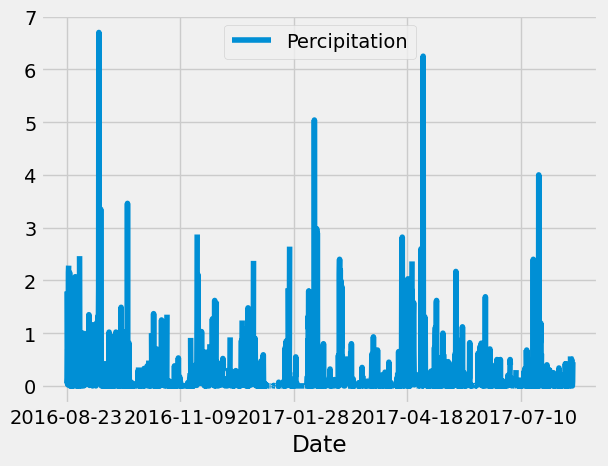

In [104]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query = "select date, prcp from measurement where julianday(date) >= (select julianday(max(date))-365 from measurement)"
measure_data = pd.DataFrame(engine.execute(query), columns=['Date', 'Percipitation']).sort_values(by='Date', ascending = True)
measure_data
# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
measure_data.plot(x='Date', y='Percipitation')

In [105]:
# Use Pandas to calculate the summary statistics for the precipitation data
measure_data.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [106]:
# Design a query to calculate the total number of stations in the dataset

#helper function to query easily
def query_db(query_text, column_list):
    return pd.DataFrame(engine.execute(query_text), columns=column_list)

query_db("select count(distinct station) from station",['Station Count'])

,Station Count
0,9


In [107]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query_db("select station, count(station) from measurement group by station order by count(station) desc"
         ,['Station','Count'])

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [108]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query_db("select min(tobs), max(tobs), avg(tobs) from measurement where station = (select station from measurement group by station order by count(station) desc limit 1)"
         ,['min temp','max temp','avg temp'])

,min temp,max temp,avg temp
0,54.0,85.0,71.663781


<Axes: ylabel='Frequency'>

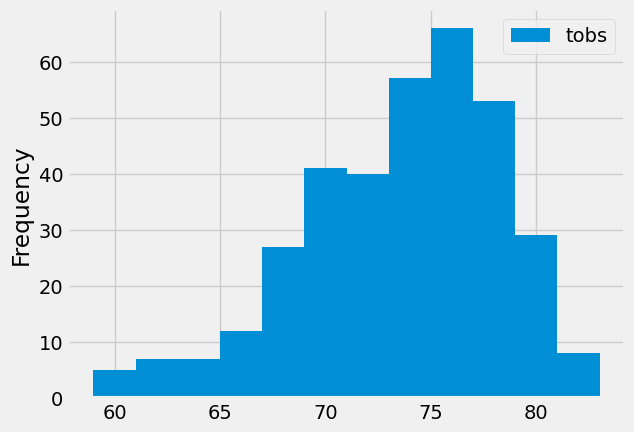

In [109]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_db("""select tobs from measurement where 
         station = (select station from measurement group by station order by count(station) desc limit 1) -- most active WS filter
         and (julianday(date) >= (select julianday(max(date))-365 from measurement)) -- most recent year filter"""
         ,['tobs']).plot(kind='hist', bins=12)

# Close Session

In [110]:
# Close Session
session.close()